In [30]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [31]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print type(images)
print images.shape
print labels.shape

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


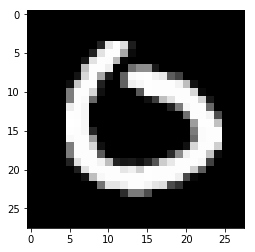

In [32]:
plt.imshow(images[1].numpy().squeeze(),cmap="Greys_r");

In [33]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs=images.view(images.shape[0],-1)

In [34]:
n_input=784
n_hidden=256
n_output=10
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
B1=torch.randn(1,n_hidden)
B2=torch.randn(1,n_output)

h=activation(torch.mm(inputs,W1)+B1)
output=torch.mm(h,W2)+B2
print output.shape

torch.Size([64, 10])


In [35]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities=softmax(output)

In [36]:
print probabilities.shape

torch.Size([64, 10])


In [37]:
print probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
